In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("data1.csv")
df1

,Unnamed: 0,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN
2,2,3,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN
3,3,4,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN
4,4,5,The Lord of the Rings: The Two Towers,179,2002,8.8,87,Peter Jackson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1738,1738,"1,739",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN
1739,1739,"1,740",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN
1740,1740,"1,741",Angels Apocalypse,85,2015,1.7,Nan,Sean Cain,Enzo Zelocchi,NaN
1741,1741,"1,742",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN


In [3]:
df2=pd.read_csv("data2.csv")
df2

,Unnamed: 0,MovieName,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
0,0,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,714,822"
1,1,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,885,048"
2,2,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,409,922"
3,3,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,913,811"
4,4,The Lord of the Rings: The Two Towers,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,Action,Adventure,Drama,342.55,PG-13,"1,701,534"
...,...,...,...,...,...,...,...,...,...,...,...,...
1738,1738,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,711"
1739,1739,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,508"
1740,1740,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,911"
1741,1741,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,406"


In [4]:
df=pd.DataFrame()

In [5]:
df = pd.merge(df1, df2)
df

,Unnamed: 0,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,714,822"
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,885,048"
2,2,3,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,409,922"
3,3,4,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,913,811"
4,4,5,The Lord of the Rings: The Two Towers,179,2002,8.8,87,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,Action,Adventure,Drama,342.55,PG-13,"1,701,534"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,1738,"1,739",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,711"
1739,1739,"1,740",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,508"
1740,1740,"1,741",Angels Apocalypse,85,2015,1.7,Nan,Sean Cain,Enzo Zelocchi,NaN,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,911"
1741,1741,"1,742",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,406"


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 1742
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S No.             1743 non-null   object 
 1   MovieName         1743 non-null   object 
 2   Duration          1743 non-null   int64  
 3   Year              1743 non-null   int64  
 4   Rating            1743 non-null   float64
 5   Metascore         1743 non-null   object 
 6   Director1         1743 non-null   object 
 7   Director2         113 non-null    object 
 8   Director3         12 non-null     object 
 9   Star1             1743 non-null   object 
 10  Star2             1743 non-null   object 
 11  Star3             1743 non-null   object 
 12  Star4             1743 non-null   object 
 13  Genre1            1743 non-null   object 
 14  Genre2            1743 non-null   object 
 15  Genre3            1743 non-null   object 
 16  Gross_Collection  1743 non-null   object 


In [8]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

1        1
1,159    1
1,170    1
1,169    1
1,168    1
        ..
578      1
577      1
576      1
575      1
1,743    1
Name: S No., Length: 1743, dtype: int64
no of unique values 1743
*****************
G                                3
Mr                               3
Ghost in the Shell               2
The Italian Job                  2
Wanted                           2
                                ..
Love and Monsters                1
Robin Hood: Prince of Thieves    1
28 Weeks Later                   1
Atlantis: The Lost Empire        1
Sadak 2                          1
Name: MovieName, Length: 1702, dtype: int64
no of unique values 1702
*****************
107    48
109    42
100    42
110    41
102    40
       ..
186     1
207     1
192     1
213     1
78      1
Name: Duration, Length: 119, dtype: int64
no of unique values 119
*****************
2016    78
2014    76
2018    70
2011    68
2019    67
        ..
1954     1
1932     1
1948     1
1949     1
1965     1
Name: Yea

In [9]:
df.replace("Nan", np.nan, inplace=True)

In [10]:
df.isnull().sum()

S No.                  0
MovieName              0
Duration               0
Year                   0
Rating                 0
Metascore            184
Director1              0
Director2           1630
Director3           1731
Star1                  0
Star2                  1
Star3                  1
Star4                  2
Genre1                 0
Genre2                 2
Genre3               142
Gross_Collection     276
Certification         10
votes                  0
dtype: int64

Dropping off columns Director 2 and Director 3 as maxiumum entries are null values.

In [11]:
df.drop(["Director2","Director3"], axis=1, inplace=True)

Using mode to fill null values for object columns - Metascore, Certification and genre 3

In [12]:
df['Metascore']=df['Metascore'].fillna(df['Metascore'].mode()[0])
df['Certification'] = df['Certification'].fillna(df['Certification'].mode()[0])
df['Genre3'] =df['Genre3'].fillna(df['Genre3'].mode()[0])

First we converted column Gross collection to float dataype and then used mean to fill null values.

In [13]:
df['Gross_Collection'] = df['Gross_Collection'].astype(float)
df['Gross_Collection'] = df['Gross_Collection'].fillna(df['Gross_Collection'].mean())

In [14]:
df.isnull().sum().sum()

6

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum().sum()

0

In [17]:
df.duplicated().sum()

0

All null values have been treated or removed. No duplicates are there in the dataset.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 1742
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S No.             1739 non-null   object 
 1   MovieName         1739 non-null   object 
 2   Duration          1739 non-null   int64  
 3   Year              1739 non-null   int64  
 4   Rating            1739 non-null   float64
 5   Metascore         1739 non-null   object 
 6   Director1         1739 non-null   object 
 7   Star1             1739 non-null   object 
 8   Star2             1739 non-null   object 
 9   Star3             1739 non-null   object 
 10  Star4             1739 non-null   object 
 11  Genre1            1739 non-null   object 
 12  Genre2            1739 non-null   object 
 13  Genre3            1739 non-null   object 
 14  Gross_Collection  1739 non-null   float64
 15  Certification     1739 non-null   object 
 16  votes             1739 non-null   object 


GTreating all columns which should be integer datatype but are object datatype.

In [19]:
df['Metascore'] = df['Metascore'].astype(int)
df['votes'] = df['votes'].str.replace(',', '').astype(int)
df['S No.'] = df['S No.'].str.replace(',', '').astype(int)

# EDA

In [20]:
df.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'Gross_Collection', 'Certification', 'votes'],
      dtype='object')

#### Duration

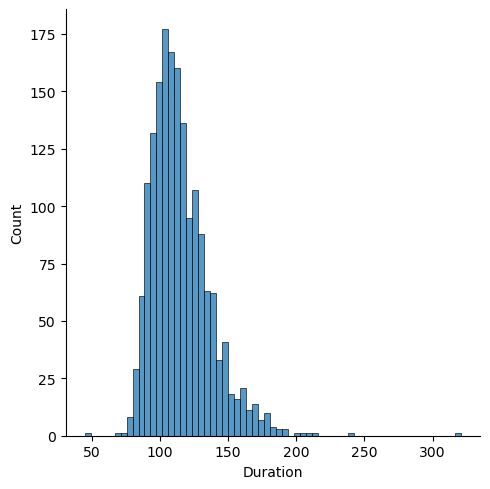

In [21]:
sns.displot(data=df, x="Duration",)

    Most movies are 90 to 120 minutes long.
    Very less movies are there which are less than 60 minutes or more than 200 minutes.


#### Year

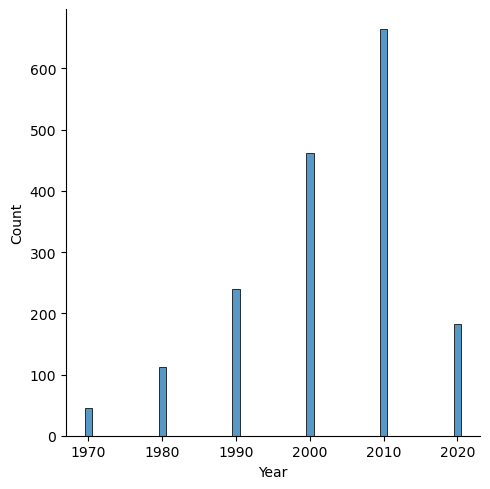

In [22]:
# Number of movies launched in the decades
sns.displot(pd.cut(df['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))
plt.show()

Most movies have been launched in the decade of 2000-2010.

#### Relation between years and ratings

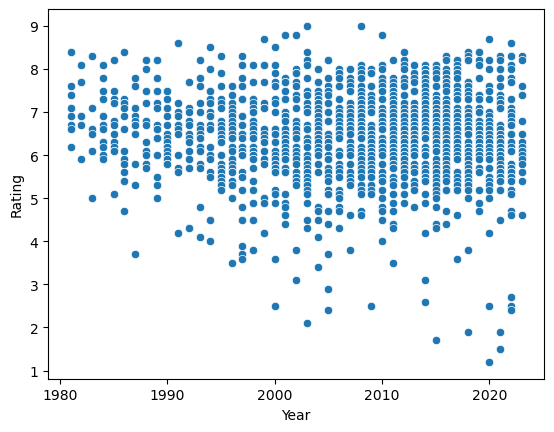

In [23]:
sns.scatterplot(x=df["Year"][df["Year"]>1980],y=df["Rating"])
plt.show()

    Highest rated movies have been released in years between 2000-2010.
    Some of new movies launched between year 2015-2020 has been the lowest rated movies.
    Trend can be seen that old movies have mostly received high ratings while some of the newer movies have received   very low ratings.

#### Metascore

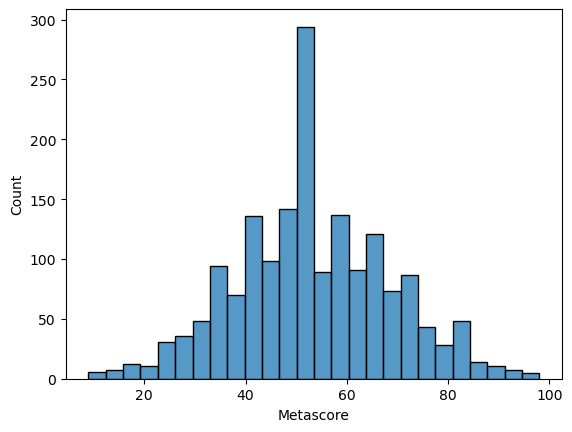

In [24]:
sns.histplot(x=df["Metascore"])
plt.show()

Metascore varies between 0 to 100 while most movies has metascore lies around 50 

#### Genre

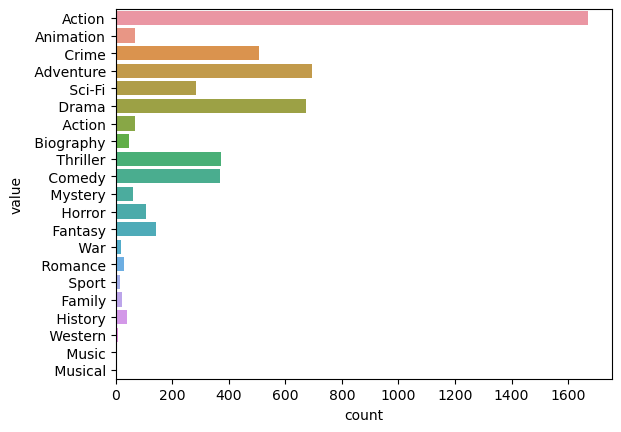

In [25]:
sns.countplot(data=pd.melt(df, value_vars=["Genre1", "Genre2", "Genre3"]), y="value")
plt.show()

Most movies are of action genre. While crime, adventure Sci-fi and drama are most common genre.

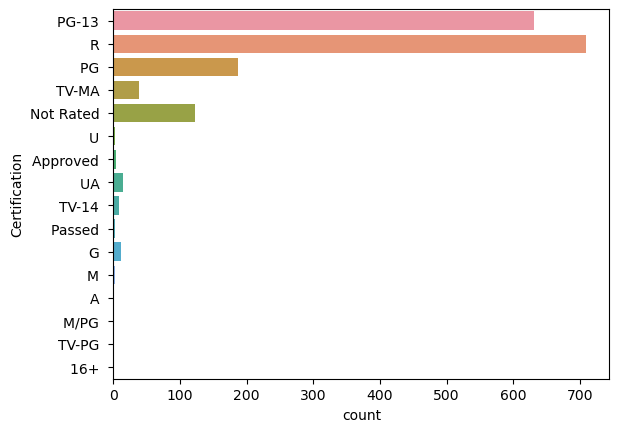

In [26]:
sns.countplot(y=df["Certification"])
plt.show()

Most movies are PG-13 and R rated.

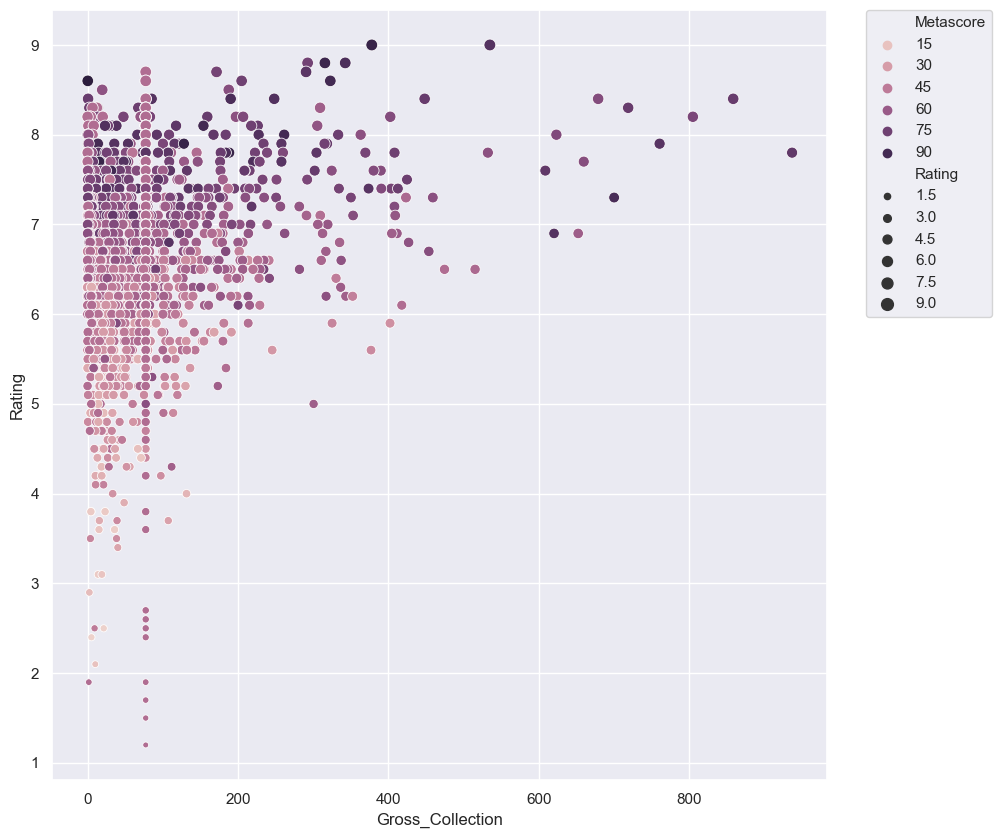

In [27]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Gross_Collection", y="Rating",
                      hue="Metascore", size="Rating",
                      data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can have the following conclusions :-

    -Higher rated movies have been found to have higher gross collection.
    -Even with high rating and metascore, movies have been found to be grossing below average.
    

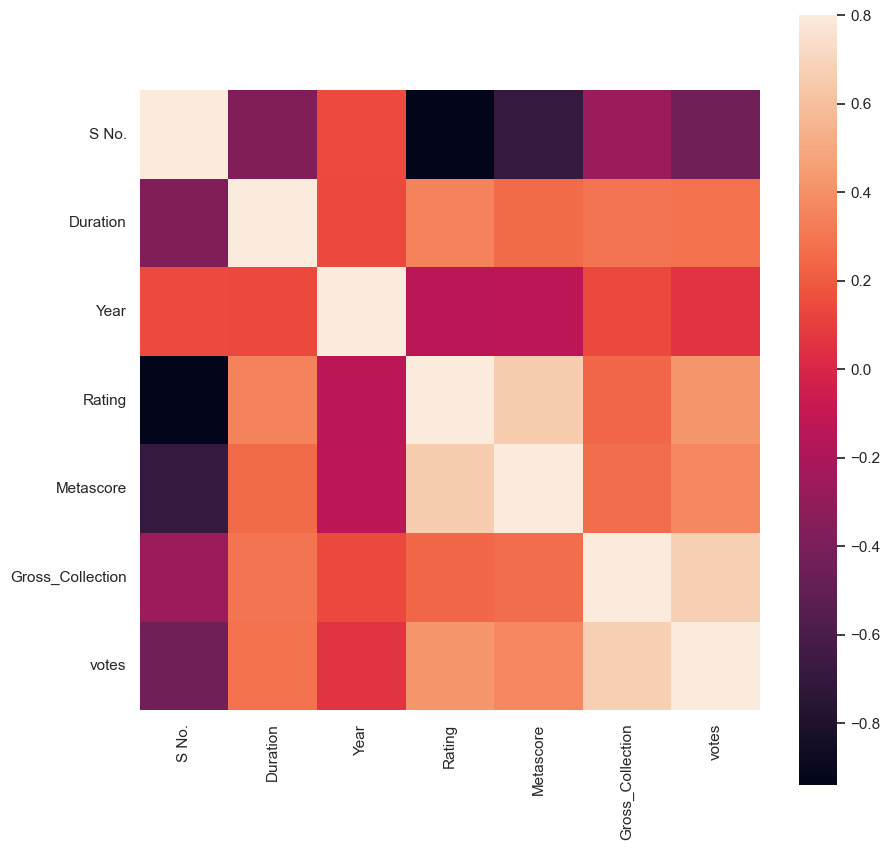

In [28]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), vmax=.8, square=True)
plt.show()

Metascore and rating are co related.

Gross collection and votes are co related.

# Preparing for machine learning

#### Dropping off columns which are not useful for machine learning


In [29]:
df.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'Gross_Collection', 'Certification', 'votes'],
      dtype='object')

In [30]:
df1=df.drop(["S No.","MovieName",], axis=1)

#### Encoding the categorical data

In [31]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df1['Director1']=le.fit_transform(df1['Director1'])
df1['Star1']=le.fit_transform(df1['Star1'])
df1['Star2']=le.fit_transform(df1['Star2'])
df1['Star3']=le.fit_transform(df1['Star3'])
df1['Star4']=le.fit_transform(df1['Star4'])
df1['Genre1']=le.fit_transform(df1['Genre1'])
df1['Genre2']=le.fit_transform(df1['Genre2'])
df1['Genre3']=le.fit_transform(df1['Genre3'])
df1['Certification']=le.fit_transform(df1['Certification'])

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 1742
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Duration          1739 non-null   int64  
 1   Year              1739 non-null   int64  
 2   Rating            1739 non-null   float64
 3   Metascore         1739 non-null   int32  
 4   Director1         1739 non-null   int32  
 5   Star1             1739 non-null   int32  
 6   Star2             1739 non-null   int32  
 7   Star3             1739 non-null   int32  
 8   Star4             1739 non-null   int32  
 9   Genre1            1739 non-null   int32  
 10  Genre2            1739 non-null   int32  
 11  Genre3            1739 non-null   int32  
 12  Gross_Collection  1739 non-null   float64
 13  Certification     1739 non-null   int32  
 14  votes             1739 non-null   int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 207.2 KB


All columns have been converted into integer or float datatype.

### Outlier Treatment
using z-score

In [33]:
z=np.abs(zscore(df1))
dfn=df1[(z<3).all(axis=1)]
dfn

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
7,153,2020,8.7,51,858,633,861,94,1357,0,5,4,77.322754,12,119393
19,101,2003,8.4,77,654,109,1138,638,734,0,5,11,0.710000,10,595512
21,137,1986,8.4,84,363,610,756,176,1039,0,1,13,85.160000,10,731852
22,145,2019,8.4,51,533,358,811,97,424,0,1,3,77.322754,6,35982
23,141,2019,8.4,51,911,163,705,976,1025,0,5,4,77.322754,6,31142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,107,2000,3.6,14,163,351,499,1315,148,0,1,6,15.220000,8,35066
1721,95,1997,3.6,11,444,557,1040,499,1201,0,1,6,35.930000,8,56304
1722,99,2017,3.6,51,26,561,336,958,1044,0,5,4,77.322754,10,33478
1723,98,1996,3.5,40,192,503,44,14,276,0,11,4,3.790000,10,30242


In [34]:
df1

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Gross_Collection,Certification,votes
0,152,2008,9.0,84,151,119,406,2,897,0,4,4,534.860000,8,2714822
1,201,2003,9.0,94,680,184,1091,462,1014,0,1,4,377.850000,8,1885048
2,148,2010,8.8,74,151,407,559,351,719,0,1,13,292.580000,8,2409922
3,178,2001,8.8,92,680,184,424,936,1218,0,1,4,315.540000,8,1913811
4,179,2002,8.8,87,680,184,424,1260,1014,0,1,4,342.550000,8,1701534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,109,2021,1.9,51,699,575,273,1003,513,0,4,15,77.322754,12,178711
1739,160,2018,1.9,51,719,43,964,143,515,0,4,15,1.690000,6,47508
1740,85,2015,1.7,51,805,192,462,1078,1404,0,7,13,77.322754,10,42911
1741,125,2021,1.5,51,494,691,56,111,407,0,4,4,77.322754,10,39406


In [35]:
(1739-1470)*100/1739

15.468660149511214

15.5 % has been removed in outlier treatment, which is under considerable range.

### Skewness Treatment

In [36]:
dfn.skew()

Duration            0.817895
Year               -0.905771
Rating             -0.290888
Metascore           0.112587
Director1          -0.112025
Star1               0.032017
Star2              -0.027933
Star3               0.038216
Star4               0.034149
Genre1              0.000000
Genre2              1.325309
Genre3              0.307338
Gross_Collection    1.820684
Certification      -0.196441
votes               1.947497
dtype: float64

We will use power transform method to remove the skewness for columns with skewness greater than 0.5, except for gross collection and votes as we need to prepare models for them.

In [37]:
from sklearn.preprocessing import power_transform

for i in dfn.drop(["Gross_Collection","votes"],axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[[f'{i}']]=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Duration
treated skewness for : Year
treated skewness for : Genre2


In [38]:
dfn.skew()

Duration            0.022449
Year               -0.348651
Rating             -0.290888
Metascore           0.112587
Director1          -0.112025
Star1               0.032017
Star2              -0.027933
Star3               0.038216
Star4               0.034149
Genre1              0.000000
Genre2              0.060586
Genre3              0.307338
Gross_Collection    1.820684
Certification      -0.196441
votes               1.947497
dtype: float64

Skewness has been removed from all the required columns

# To prepare model for Gross Collection.

### Scaling of Independent features

In [39]:
X=dfn.drop(["Gross_Collection"],axis=1)
y=dfn["Gross_Collection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

### Predicting the best random state

In [40]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.4863171031703776
At random state 0, The test accuracy is :-0.49174373326645493


At random state 1, The training accuracy is :-0.44236746493437473
At random state 1, The test accuracy is :-0.5552673112485585


At random state 2, The training accuracy is :-0.4826834422366514
At random state 2, The test accuracy is :-0.5012331232950298


At random state 3, The training accuracy is :-0.45738785947791893
At random state 3, The test accuracy is :-0.5358298813712956


At random state 4, The training accuracy is :-0.48434789212845497
At random state 4, The test accuracy is :-0.4972990352741349


At random state 5, The training accuracy is :-0.5099971689536116
At random state 5, The test accuracy is :-0.44222919931960214


At random state 6, The training accuracy is :-0.4970390440894956
At random state 6, The test accuracy is :-0.4692480610825346


At random state 7, The training accuracy is :-0.49912867153775786
At random state 7, The test accur

At random state 66, The training accuracy is :-0.4449930388186971

At random state 66, The test accuracy is :-0.5614280456806506

In [41]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=66)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(984, 14) (984,)
(486, 14) (486,)


In [42]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 32.71197453475246
Mean Squared Error: 1879.0923699356952
Root Mean Squared Error: 43.34849905055186
R squared score:  0.5614280456806506
Cross Validation Score is : [0.4427487  0.42741664 0.41723387 0.4550479  0.37908997]
Mean Score : 0.42430741570170205
Difference : -0.13712062997894858


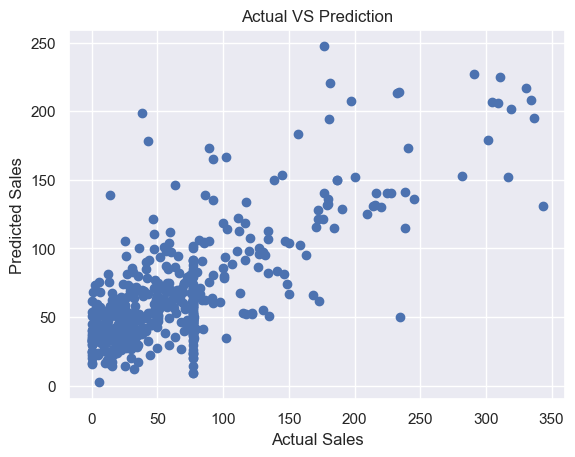



Scores for Lasso() are
Mean Absolute Error: 32.89384300081783
Mean Squared Error: 1892.3837631809724
Root Mean Squared Error: 43.501537480656616
R squared score:  0.5583258925324222
Cross Validation Score is : [0.43652818 0.41929749 0.41853084 0.46089275 0.38969752]
Mean Score : 0.4249893577432477
Difference : -0.13333653478917445


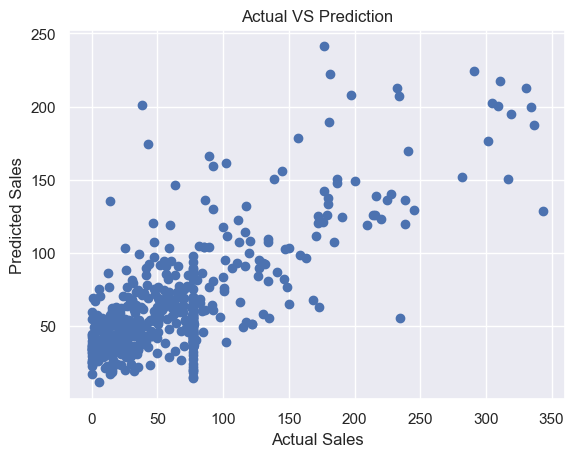



Scores for SVR() are
Mean Absolute Error: 40.24176118105696
Mean Squared Error: 3688.2332324718523
Root Mean Squared Error: 60.7308260479952
R squared score:  0.1391824677537773
Cross Validation Score is : [0.14752496 0.10850758 0.02469912 0.12779522 0.11624646]
Mean Score : 0.10495466632469949
Difference : -0.0342278014290778


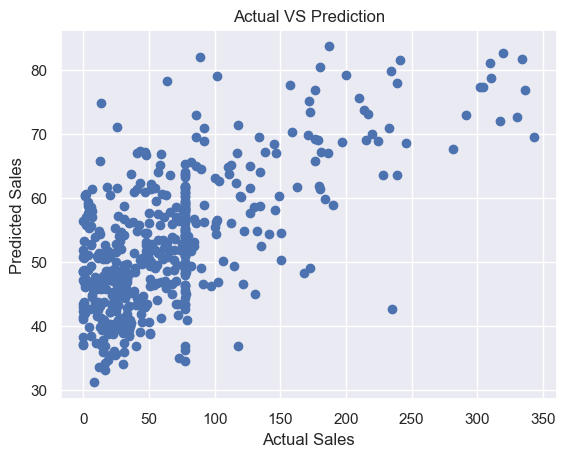



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 41.687213021170855
Mean Squared Error: 3552.8060863379824
Root Mean Squared Error: 59.60541994095824
R squared score:  0.17079057233559514
Cross Validation Score is : [-0.47634342 -0.03671935 -0.03854853  0.16868033  0.12424227]
Mean Score : -0.051737739445030684
Difference : -0.22252831178062582


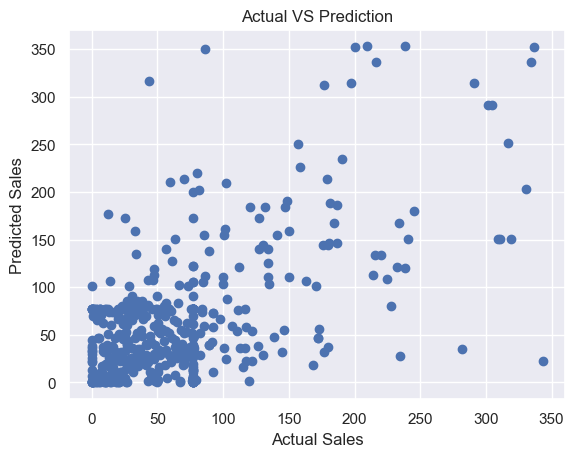



Scores for RandomForestRegressor() are
Mean Absolute Error: 28.135009525332357
Mean Squared Error: 1501.819834603616
Root Mean Squared Error: 38.75332030424769
R squared score:  0.6494818081134511
Cross Validation Score is : [0.52153017 0.50507975 0.450106   0.57485654 0.4993899 ]
Mean Score : 0.5101924720255221
Difference : -0.13928933608792904


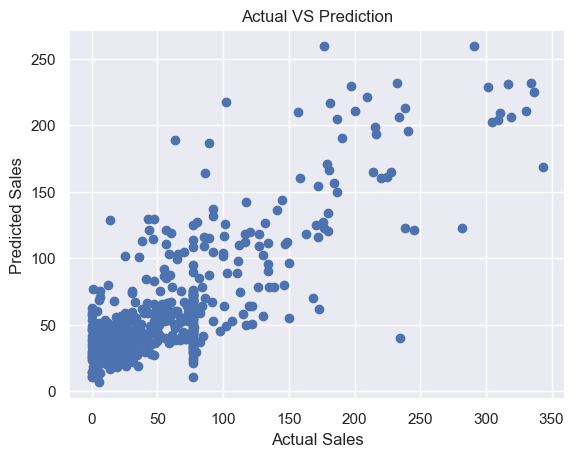



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 27.69134067942002
Mean Squared Error: 1431.0580112785685
Root Mean Squared Error: 37.8293273965923
R squared score:  0.665997308704797
Cross Validation Score is : [0.58306637 0.50496206 0.47774062 0.57442883 0.48525347]
Mean Score : 0.5250902704502654
Difference : -0.14090703825453166


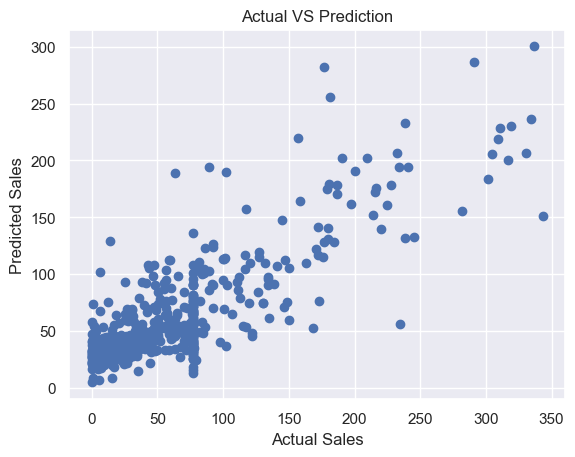

In [43]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

### It is evident that GradientBoostingRegressor() gives the best result.  Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

## Hyperparamter Tuning and treating overfitting/underfitting

In [44]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [45]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [46]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'squared_error',
 'loss': 'squared_error',
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [62]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.7930501031773
The mean absolute error 56214.16350595966
root_mean_squared_error: 78931.15635854716


In [63]:
import joblib
joblib.dump(GB,"gross_collection.obj")

['gross_collection.obj']

In [64]:
GB_l=joblib.load('gross_collection.obj')

# To prepare model for  Number of votes.

### Scaling of Independent Features

In [50]:
X=dfn.drop(["votes"],axis=1)
y=dfn["votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

### Predicting the best random state

In [51]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.523937049727217
At random state 0, The test accuracy is :0.5376302354192722


At random state 1, The training accuracy is :0.4882717245427457
At random state 1, The test accuracy is :0.6218999865494999


At random state 2, The training accuracy is :0.5408584217171954
At random state 2, The test accuracy is :0.517974485968925


At random state 3, The training accuracy is :0.5092903740975292
At random state 3, The test accuracy is :0.5698901242743355


At random state 4, The training accuracy is :0.5439710575378426
At random state 4, The test accuracy is :0.5150143214472036


At random state 5, The training accuracy is :0.568280691112399
At random state 5, The test accuracy is :0.44561351740124233


At random state 6, The training accuracy is :0.5254500756676226
At random state 6, The test accuracy is :0.5520185397367635


At random state 7, The training accuracy is :0.5411052050512715
At random state 7, The test accuracy is :0.5201473650743

At random state 1, The training accuracy is :0.4882717245427457
At random state 1, The test accuracy is :0.6218999865494999

In [52]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(984, 14) (984,)
(486, 14) (486,)


Scores for LinearRegression() are
Mean Absolute Error: 74605.10535704278
Mean Squared Error: 10191578203.707165
Root Mean Squared Error: 100953.34666917767
R squared score:  0.6218999865494999
Cross Validation Score is : [0.45651668 0.46301544 0.54442082 0.37202399 0.41449587]
Mean Score : 0.4500945583235845
Difference : -0.17180542822591532


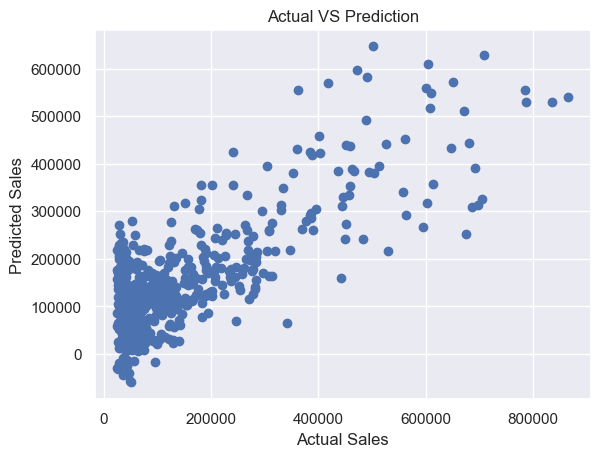



Scores for Lasso() are
Mean Absolute Error: 74605.14024359426
Mean Squared Error: 10191614667.703918
Root Mean Squared Error: 100953.52726727244
R squared score:  0.6218986337621899
Cross Validation Score is : [0.45652148 0.46301261 0.5444216  0.37203337 0.41449582]
Mean Score : 0.4500969754298406
Difference : -0.17180165833234928


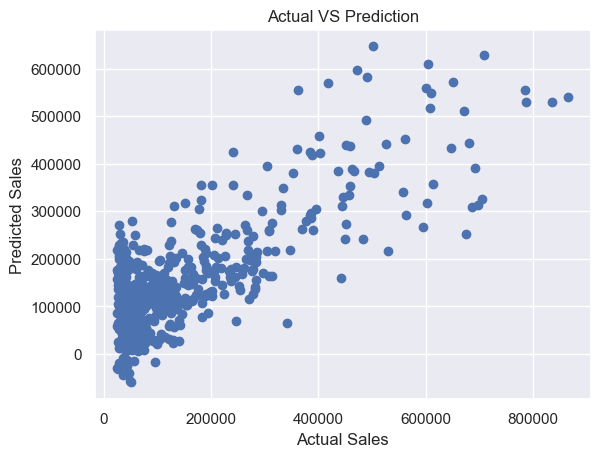



Scores for SVR() are
Mean Absolute Error: 109324.02931808037
Mean Squared Error: 31228672595.056065
Root Mean Squared Error: 176716.3619902132
R squared score:  -0.15856065588909352
Cross Validation Score is : [-0.13904002 -0.14636024 -0.20248712 -0.10235089 -0.12169587]
Mean Score : -0.14238682718885293
Difference : 0.01617382870024059


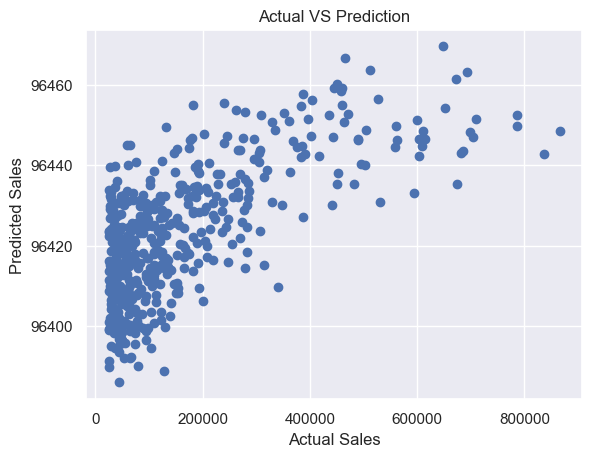



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 79565.23868312757
Mean Squared Error: 15857136586.71605
Root Mean Squared Error: 125925.12293706943
R squared score:  0.4117119609068127
Cross Validation Score is : [0.10035693 0.35659901 0.39738503 0.26850745 0.41731803]
Mean Score : 0.30803328979145744
Difference : -0.10367867111535528


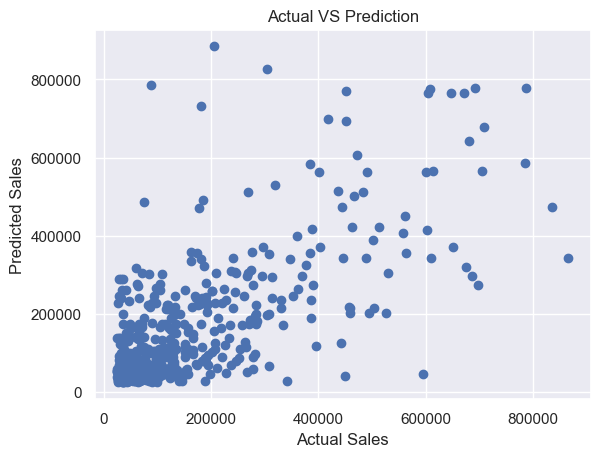



Scores for RandomForestRegressor() are
Mean Absolute Error: 54786.9950617284
Mean Squared Error: 6121124963.256168
Root Mean Squared Error: 78237.61859397414
R squared score:  0.7729107911768275
Cross Validation Score is : [0.66231638 0.65434554 0.7073977  0.61167074 0.65406586]
Mean Score : 0.6579592438276508
Difference : -0.11495154734917667


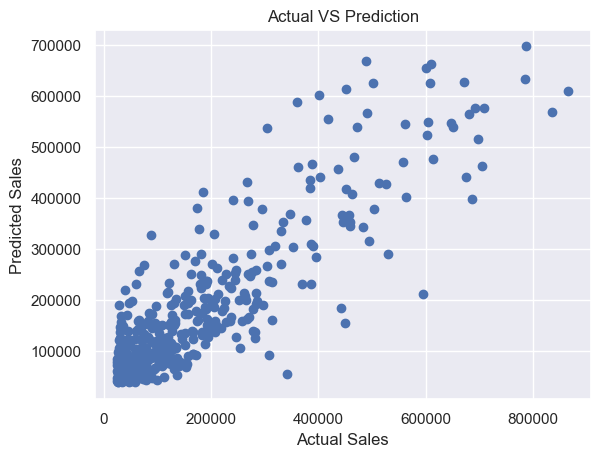



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 51963.74677737629
Mean Squared Error: 5268106296.451588
Root Mean Squared Error: 72581.72150377523
R squared score:  0.8045571528046097
Cross Validation Score is : [0.65106826 0.70791675 0.75116672 0.71819211 0.68138529]
Mean Score : 0.701945825667603
Difference : -0.10261132713700671


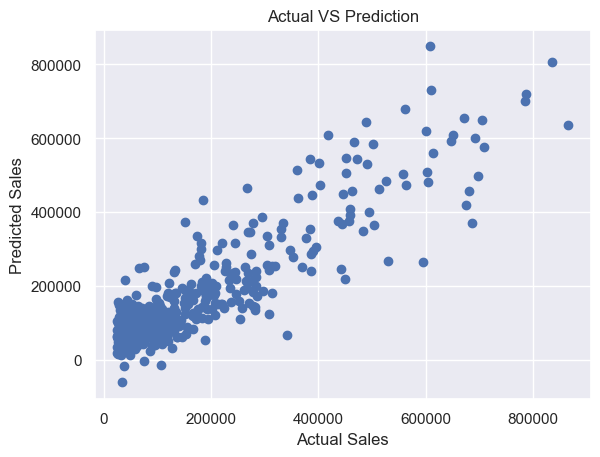

In [53]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

### It is evident that GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

### Hyperparamter Tuning and treating overfitting/underfitting

In [54]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [55]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [59]:
GB1= GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 0.7983258236959498
The mean absolute error 53390.96980596826
root_mean_squared_error: 73729.70906147033


In [60]:
import joblib
joblib.dump(GB1,"votes.obj")

['votes.obj']

In [61]:
GB1_l=joblib.load('votes.obj')